# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, I design and implement a deep learning model that learns to recognize traffic signs.
The image dataset used is the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# Get the dataset values training and testing data

training_file = "./data/train.p"
validation_file="./data/valid.p"
testing_file =  "./data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
# summarize dataset shape
print('Train', X_train.shape, y_train.shape)
print('Valid', X_valid.shape, y_valid.shape)
print('Test', (X_test.shape, y_test.shape))
# summarize pixel values
print('Train', X_train.min(), X_train.max(), round(X_train.mean(), 3), round(X_train.std(), 3))
print('Valid', X_valid.min(), X_valid.max(), round(X_valid.mean(), 3), round(X_valid.std(), 3))
print('Test',  X_test.min(),  X_test.max(),  round(X_test.mean(), 3),  round(X_test.std(), 3))

Train (34799, 32, 32, 3) (34799,)
Valid (4410, 32, 32, 3) (4410,)
Test ((12630, 32, 32, 3), (12630,))
Train 0 255 82.678 67.851
Valid 0 255 83.556 69.888
Test 0 255 82.148 68.744


In [3]:
import pandas as pd
df_labels = pd.read_csv("signnames.csv")
df_labels.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [4]:
df_labels.shape

(43, 2)

In [6]:
# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1],X_train.shape[2]

# How many unique classes/labels there are in the dataset.
n_classes = df_labels.shape[0]

print("Number of training samples =", n_train)
print("Number of validation samples =", n_validation)
print("Number of testing samples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training samples = 34799
Number of validation samples = 4410
Number of testing samples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Exploratory visualization of the dataset

We can visualize the German Traffic Signs Dataset using the pickled file(s) image loaded above.

In [7]:
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

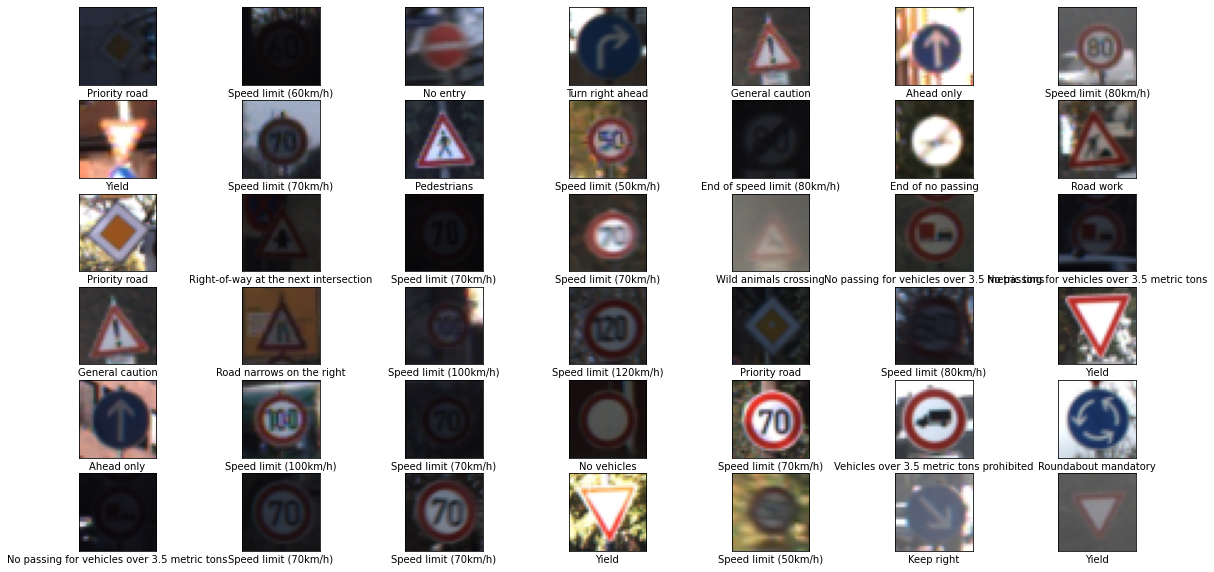

In [8]:
plt.figure(figsize=(20,10))
for i in range(42):
    plt.subplot(6,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    plt.imshow(image, cmap='Blues')
    plt.xlabel(df_labels.SignName[y_train[index]])
plt.show()

How training and validation images are distributed? Lets take a look.

In [15]:
import numpy as np

X_all = np.concatenate((X_train, X_valid), axis=0)
y_all = np.concatenate((y_train, y_valid), axis=0)

classes = pd.DataFrame(y_all).value_counts()

In [16]:
class_describe = classes.describe()

In [17]:
class_describe

count      43.000000
mean      911.837209
std       695.856715
min       210.000000
25%       345.000000
50%       600.000000
75%      1425.000000
max      2250.000000
dtype: float64

In [18]:
classes.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

In [19]:
n_total = classes.sum()
for i in range(len(classes)):
    print(f"Class {df_labels.SignName[i]} has {classes[i]} samples ({round((classes[i]/n_total)*100.,2)}%)")

Class Speed limit (20km/h) has 210 samples (0.54%)
Class Speed limit (30km/h) has 2220 samples (5.66%)
Class Speed limit (50km/h) has 2250 samples (5.74%)
Class Speed limit (60km/h) has 1410 samples (3.6%)
Class Speed limit (70km/h) has 1980 samples (5.05%)
Class Speed limit (80km/h) has 1860 samples (4.74%)
Class End of speed limit (80km/h) has 420 samples (1.07%)
Class Speed limit (100km/h) has 1440 samples (3.67%)
Class Speed limit (120km/h) has 1410 samples (3.6%)
Class No passing has 1470 samples (3.75%)
Class No passing for vehicles over 3.5 metric tons has 2010 samples (5.13%)
Class Right-of-way at the next intersection has 1320 samples (3.37%)
Class Priority road has 2100 samples (5.36%)
Class Yield has 2160 samples (5.51%)
Class Stop has 780 samples (1.99%)
Class No vehicles has 630 samples (1.61%)
Class Vehicles over 3.5 metric tons prohibited has 420 samples (1.07%)
Class No entry has 1110 samples (2.83%)
Class General caution has 1200 samples (3.06%)
Class Dangerous curve t

D:\dl_toolkits\miniconda3\envs\carnd-t1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


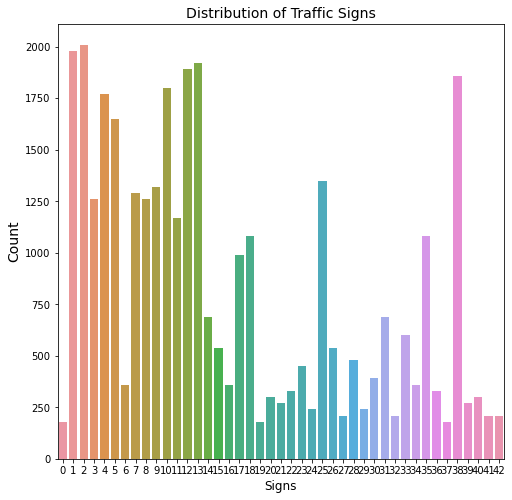

In [20]:
import seaborn as sns
def plot_distribution(y):
    fig, ax = plt.subplots(figsize=(8,8))
    sns.countplot(y)
    ax.set_title('Distribution of Traffic Signs', fontsize=14)
    ax.set_xlabel('Signs', fontsize=12)
    ax.set_ylabel('Count', fontsize=14)
    plt.show()

plot_distribution(y_train)

In [21]:
classTotals = y_all.sum()
classTotals.max()

619047

In [17]:
y_train

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

The graphic above shows that our dataset is highly imbalanced. Lets try to use the class weight approach.



## Step 2: Design and Test a Model Architecture



The LeNet-5 implementation can be used as a solid staring point. Changing the number of classes and possibly the preprocessing, may be what we need to reach the target. 

With the LeNet-5 solution, we should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 255)/ 255` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.ticker as mticker
from sklearn.metrics import multilabel_confusion_matrix
from skimage.color import rgb2gray

In [19]:
def conv_rgb2gray(img):
    return rgb2gray(img)

def format_image(data):        
    image = data["features"]
    image = tf.cast(image, 'float32')
    image = image / 255.0
    return image, data["labels"]

In [20]:
train.pop('coords')
valid.pop('coords')
test.pop('coords')

array([[ 6,  5, 48, 49],
       [ 5,  5, 36, 40],
       [ 6,  6, 43, 47],
       ...,
       [ 6,  6, 24, 24],
       [ 5,  6, 43, 44],
       [ 6,  5, 27, 26]], dtype=uint8)

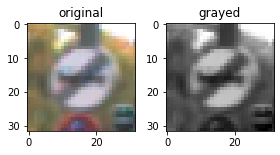

In [21]:
# check an example
i_img = 100
img_original = X_train[i_img].squeeze()
grayed = conv_rgb2gray(img_original)

fig, axes = plt.subplots(1, 2,  figsize=(4,4))
fig.subplots_adjust(wspace=1)
ax = axes.ravel()
ax[0].imshow(img_original)
ax[0].set_title("original")
ax[1].imshow(grayed, cmap='gray')
ax[1].set_title("grayed")
fig.tight_layout()
plt.show()

In [23]:
# check the conversion by verifying the number of channels
X_train[0].shape, X_valid[0].shape, X_test[0].shape

((32, 32, 3), (32, 32, 3), (32, 32, 3))

In [24]:
# Integrate normalized to original dataset
train['features'] = X_train
valid['features'] = X_valid
test['features'] = X_test

We shuffle the train dataset based on the batch size and prepare a batched dataset to be used for training in our custom training loop.<br>
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

In [25]:
EPOCHS = 100
BATCH_SIZE = 128

In [ ]:
# Normalize dataset
train_norm = tf.data.Dataset.from_tensor_slices(train).map(format_image)
valid_norm = tf.data.Dataset.from_tensor_slices(valid).map(format_image)
test_norm = tf.data.Dataset.from_tensor_slices(test).map(format_image)

# Do shuffle and create batches
train_dataset = train_norm.shuffle(buffer_size=len(train_norm)).batch(BATCH_SIZE)
valid_dataset = valid_norm.batch(batch_size=BATCH_SIZE)
test_dataset =  test_norm.batch(batch_size=BATCH_SIZE)

# how dataset is mapped
xx, yy = next(iter(train_dataset))
print(xx.shape, yy.shape)

## Model Architecture

Input<br>
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since we converted the images are grayscale, C is 1 in this case.

Architecture<br>
**Layer 1:** Convolutional.<br>
The output shape should be 28x28x6.

Activation.<br>
The selected activation function.

Pooling.<br> The output shape should be 14x14x6.

**Layer 2:** Convolutional.<br>
The output shape should be 10x10x16.

Activation.<br>
The selected activation function.

Pooling.<br>
The output shape should be 5x5x16.

Flatten.<br>
Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using tf.layers.flatten.

**Layer 3:** Fully Connected.<br>
This should have 120 outputs.

Activation.<br>
The activation function.

**Layer 4:** Fully Connected.<br>
This should have 84 outputs.

Activation.<br>
The activation function.

**Layer 5:** Fully Connected (Logits).<br>
This should have 10 outputs.

Output<br>
Return the result of the 2nd fully connected layer.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. In this project, we will configure our CNN to process inputs of shape (32, 32, 3), which is the format of our dataset images. We can do this by passing the argument input_shape to our first layer.

In [26]:
def build_model():
    model = tf.keras.Sequential([
        # Input: 32x32x3
        tf.keras.Input(shape=(32,32,3)),
        # The formulation in convolution layer is ((N + 2*P - F)/S)+1
        # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x32.
        # params: N=32, P=0, F=5x5, S=1
        # Operation: (32 + 2*0 - 5)/1 + 1 = 32-5+1 = 28x28
        tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), padding='valid', activation='relu'),
        # max pooling: S=2
        # Operation: output = 14X14X32
        tf.keras.layers.MaxPool2D(strides=2),
        # Layer 2: Convolutional. 
        # Operation: (14 + 2*0 - 5)/1 + 1 =  10x10x16
        tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='relu'),
        # max pooling: S=1
        # Operation: output = 9x9x16
        tf.keras.layers.MaxPool2D(strides=1),
        # Flatten. Input = 9x9x16. Output = 1296
        tf.keras.layers.Flatten(),
        # Layer 3: Fully Connected. 
        tf.keras.layers.Dense(units=120, activation='relu'),
        # Layer 4: Fully Connected.
        tf.keras.layers.Dense(units=84, activation='relu'),
        # Layer 5: Fully Connected. The output layer
        tf.keras.layers.Dense(units=43, activation='softmax')
    ])
    return model
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        12816     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1296)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               155640    
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

## Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

### Train the model.
### - Calculate and report the accuracy on the training and validation set.
### - Once a final model architecture is selected, 
### - the accuracy on the test set can be calculated and reported as well.

## Define Optimizer and Loss 

We use Adam optimizer and cross entropy function

In [28]:
l_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=l_rate)
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

In [29]:
# Metrics
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

In [30]:
model.compile(optimizer=optimizer, loss=loss_object, metrics=['accuracy'])

## Checkpoint

In [47]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

## Evaluate Untrained Model
We calculate the loss on the model before training begins.

In [53]:
# Evaluate the model
loss, acc = model.evaluate(test_dataset, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

99/99 - 1s - loss: 3.7611 - accuracy: 0.0079
Untrained model, accuracy:  0.79%


In [56]:
history = model.fit(train_dataset,
    validation_data=valid_dataset,
    epochs=EPOCHS,
    callbacks=[cp_callback],
     verbose=1)

y: 0.7390 - val_loss: 3.1166 - val_accuracy: 0.6837
Epoch 29/100
270/272 [============================>.] - ETA: 0s - loss: 3.0612 - accuracy: 0.7387
Epoch 00029: saving model to training_1\cp.ckpt
272/272 [==============================] - 2s 7ms/step - loss: 3.0614 - accuracy: 0.7386 - val_loss: 3.1276 - val_accuracy: 0.6723
Epoch 30/100
270/272 [============================>.] - ETA: 0s - loss: 3.0623 - accuracy: 0.7378
Epoch 00030: saving model to training_1\cp.ckpt
272/272 [==============================] - 3s 10ms/step - loss: 3.0624 - accuracy: 0.7378 - val_loss: 3.1279 - val_accuracy: 0.6723
Epoch 31/100
270/272 [============================>.] - ETA: 0s - loss: 3.0605 - accuracy: 0.7394
Epoch 00031: saving model to training_1\cp.ckpt
272/272 [==============================] - 2s 7ms/step - loss: 3.0608 - accuracy: 0.7391 - val_loss: 3.1192 - val_accuracy: 0.6807
Epoch 32/100
268/272 [============================>.] - ETA: 0s - loss: 3.0602 - accuracy: 0.7397
Epoch 00032: savin

## Evaluate Trained Model

We calculate the loss on the model after training.

In [57]:
# Loads the weights
#model.load_weights(checkpoint_path)

# Re-evaluate the model
loss, acc = model.evaluate(test_dataset, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

99/99 - 1s - loss: 3.0426 - accuracy: 0.7571
Restored model, accuracy: 75.71%


In [16]:
def plot_history(history, epochs):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(10, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

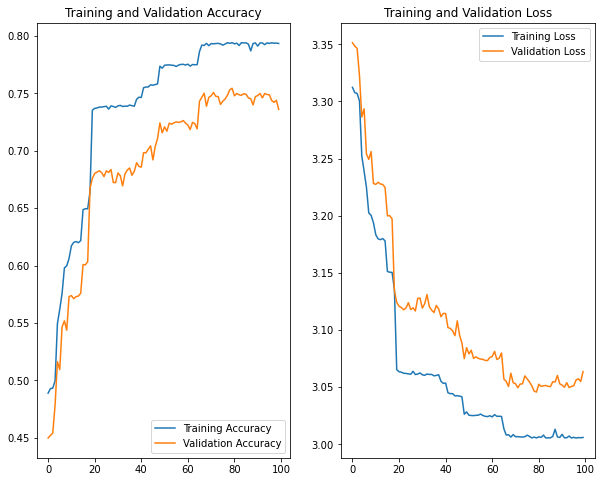

In [60]:
plot_history(history, EPOCHS)

The performance is not so good and it seems to be overfiting once that the losses are not decreasing. 
The approach using Model Centric showed that we got a prediction still far from the target of 0.93 for validation accuracy.
So, lets let change toa different approach to improve the model performance.

## Improvements using Data Centric approach

In data centric approach, we focus on working to improve the data quality to improve the model prediction. So, we will work with the options:

1. Class balance
2. Data augmentation
3. Grayscale image

As showed on the start of this project, we have a high class imbalance, which may be penalising the model prediction. There are some solutions like:

1. Delete images from classes that has higher number of images to allow a better image balance
2. Collect more images to classes that has low number of images
3. Create more images using a synthetic approach, increasing the number of images to classes with low number of images.

I decided to use the third option: create synthetic images using augmentation.<br>
For this task I used the [Augmentor](https://academic.oup.com/bioinformatics/article-abstract/35/21/4522/5466454?redirectedFrom=fulltext) tool, where I could create an equal number of images to all classes, removing the class imbalance.

But before go to creation synthetic data, I verified that in many classes the images are very dark, making the images to may seem "unnatural" to human eye and providing an image almost impossible to identify. So, I decided to apply an algorithm named [Contrast Limited Adaptive Histogram Equalization](https://en.wikipedia.org/wiki/Adaptive_histogram_equalization), implemented in `scikit-image library`. The algorithm can improve the contrast of traffic sign images dataset, which will help the deep learning model identify the traffic signs.

After create the synthetic data, I organized the new dataset on disk, creating a directory for each class, which allowed the use of `tensorflow.keras.preprocessing.image_dataset_from_disk` function to load the images to memory. During the image loading, we can provide some option to the keras method like image size, batch size and other parameters used by the model.

In [2]:
import tensorflow as tf
import pathlib
import numpy as np

In [3]:
# Find images on disk

data_dir = './data/images'
data_dir = pathlib.Path(data_dir)
class_count = len(list(data_dir.glob('*/')))
image_count = len(list(data_dir.glob('*/*.jpg')))
print(f'We have:\nclasses: {class_count}\nimages: {image_count}\nimages per class:{image_count/class_count}')

We have:
classes: 43
images: 193500
images per class:4500.0


Note that now we have 2010 images per class and 43 classes, or<br>
**2010 * 43 = 86430**<br>
which means that now we have balanced classes.

We cam use the [Contrast Limited Adaptive Histogram Equalization (CLAHE)](https://en.wikipedia.org/wiki/Adaptive_histogram_equalization#CLAHE) to improve image contrast. Note that how the original images,the contrast is very low and some signs cannot be recognize.

## Load images to memory##

During loading, the `tf.keras.preprocessing.image_dataset_from_directory` function can split the images into **training** and **validation** datasets.

In [4]:
# Changing the batch size to 64

batch_size = 64
img_height = 32
img_width = 32

In [5]:
# Using 80% for training
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  shuffle=True,
  seed=123,
  #color_mode="grayscale",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 193500 files belonging to 43 classes.
Using 154800 files for training.


In [6]:
# Using 20% for validation
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  shuffle=True,
  #color_mode="grayscale",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 193500 files belonging to 43 classes.
Using 38700 files for validation.


## Visualize the data

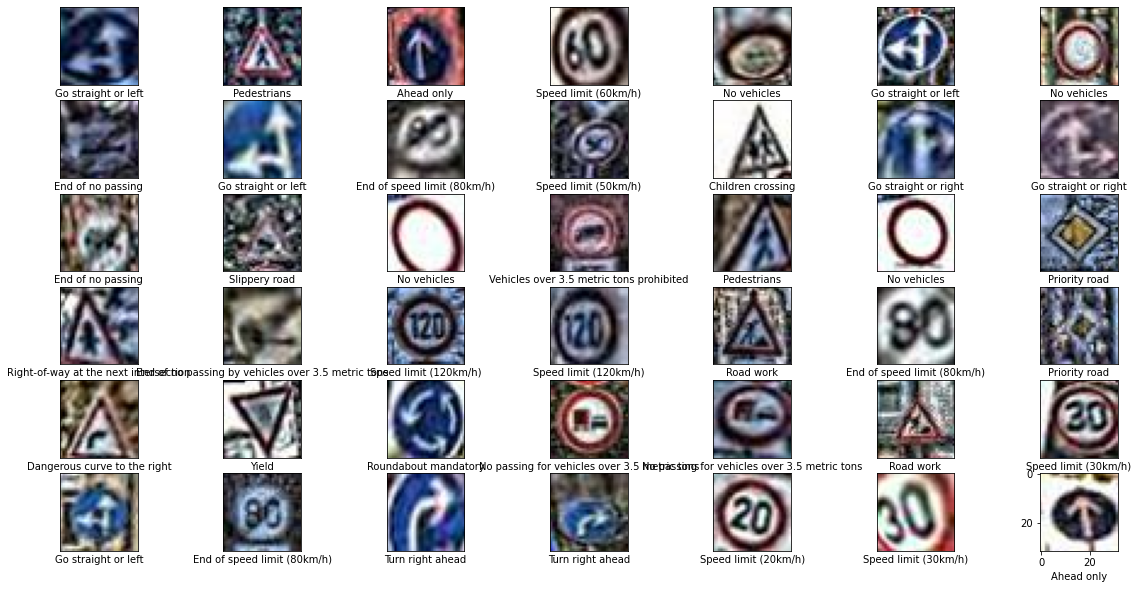

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

df_labels = pd.read_csv("signnames.csv")
class_names = train_ds.class_names
plt.figure(figsize=(20, 10))
for images, labels in train_ds.take(1):
    for i in range(42):
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        ax = plt.subplot(6, 7, i + 1)
        #plt.title(class_names[labels[i]])
        plt.imshow(images[i].numpy().astype("uint8"), cmap='gray')
        plt.xlabel(df_labels.SignName[int(class_names[labels[i]])])
        #plt.axis("off")
plt.show()

In [8]:
class_list = train_ds.class_names

## Standardize the data

The original images are in RGB color and I decided to try train using color images, where channel values are in the [0, 255] range. This is not ideal for a neural network; in general you should seek to make your input values small. Here, we will standardize values to be in the [0, 1] by using a Rescaling layer.

In [9]:
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

I can apply the new layer directly to dataset or add a new layer to the model. I will use the second option.


## Configure the dataset for performance
I will use two important methods when loading data.

`.cache()` keeps the images in memory after they're loaded off disk during the first epoch. 
This will ensure the dataset does not become a bottleneck while training your model.
`.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Train the model

In [11]:
def build_model():
    model = tf.keras.Sequential([
        # Input: 32x32x3
        tf.keras.Input(shape=(32,32,3)),
        tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
        # The formulation in convolution layer is ((N + 2*P - F)/S)+1
        # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x32.
        # params: N=32, P=0, F=5x5, S=1
        # Operation: (32 + 2*0 - 5)/1 + 1 = 32-5+1 = 28x28
        tf.keras.layers.Conv2D(filters=128, kernel_size=(5,5), padding='valid', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        # max pooling: S=2
        # Operation: output = 14X14X32
        tf.keras.layers.MaxPool2D(strides=2),
        tf.keras.layers.Dropout(0.2),
        # Layer 2: Convolutional. 
        # Operation: (14 + 2*0 - 5)/1 + 1 =  10x10x16
        tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='valid', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        # max pooling: S=1
        # Operation: output = 9x9x16
        tf.keras.layers.MaxPool2D(strides=1),
        tf.keras.layers.Dropout(0.2),
        # Flatten. Input = 9x9x16. Output = 1296
        tf.keras.layers.Flatten(),
        # Layer 3: Fully Connected. 
        tf.keras.layers.Dense(units=120, activation='relu'),
        # Layer 4: Fully Connected.
        tf.keras.layers.Dense(units=84, activation='relu'),
        # Layer 5: Fully Connected. The output layer
        tf.keras.layers.Dense(units=43, activation='softmax')
    ])
    return model
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 128)       9728      
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 128)       512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        204864    
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 64)        2

In [12]:

l_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=l_rate)
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

## Checkpoint

The checkpoint will save each best model weights, using the current epochs and the validation accuracy value in the string name.

In [13]:
checkpoint_path = "./checkpoint/training_15/weights.{epoch:02d}-{val_accuracy:.4f}.hdf5"
#checkpoint_path = "./weights.{epoch:02d}-{val_accuracy:.4f}.hdf5"   # for Windows

## Calbacks

During training, the callbacks will monitor the following tasks:

1. Checkpoint to save the best weights
2. Reduce the learning rate at each `patience` value
3. Use early stop when training process does not improve

In [14]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=2)
reduce_lr_cb = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1,
                            patience=10, min_lr=1E-7, verbose=2)
es_cb = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', min_delta=0, patience=22, verbose=2,
    mode='auto', baseline=None, restore_best_weights=True)
                         
model.compile(optimizer=optimizer,
              loss=loss_object,
              metrics=['accuracy'])

## Training the model

In [13]:
history7=model.fit(train_ds, 
    validation_data=val_ds, 
    epochs=1000,
    callbacks=[cp_callback, reduce_lr_cb, es_cb],
    verbose=2)

Epoch 1/1000

Epoch 00001: val_accuracy improved from -inf to 0.94307, saving model to .\weights.01-0.9431.hdf5
2419/2419 - 867s - loss: 0.4232 - accuracy: 0.8750 - val_loss: 0.1897 - val_accuracy: 0.9431
Epoch 2/1000

Epoch 00002: val_accuracy improved from 0.94307 to 0.94835, saving model to .\weights.02-0.9483.hdf5
2419/2419 - 21s - loss: 0.1162 - accuracy: 0.9645 - val_loss: 0.1753 - val_accuracy: 0.9483
Epoch 3/1000

Epoch 00003: val_accuracy improved from 0.94835 to 0.97297, saving model to .\weights.03-0.9730.hdf5
2419/2419 - 21s - loss: 0.0848 - accuracy: 0.9742 - val_loss: 0.0938 - val_accuracy: 0.9730
Epoch 4/1000

Epoch 00004: val_accuracy did not improve from 0.97297
2419/2419 - 21s - loss: 0.0671 - accuracy: 0.9795 - val_loss: 0.0947 - val_accuracy: 0.9711
Epoch 5/1000

Epoch 00005: val_accuracy did not improve from 0.97297
2419/2419 - 21s - loss: 0.0569 - accuracy: 0.9829 - val_loss: 0.1122 - val_accuracy: 0.9702
Epoch 6/1000

Epoch 00006: val_accuracy improved from 0.972

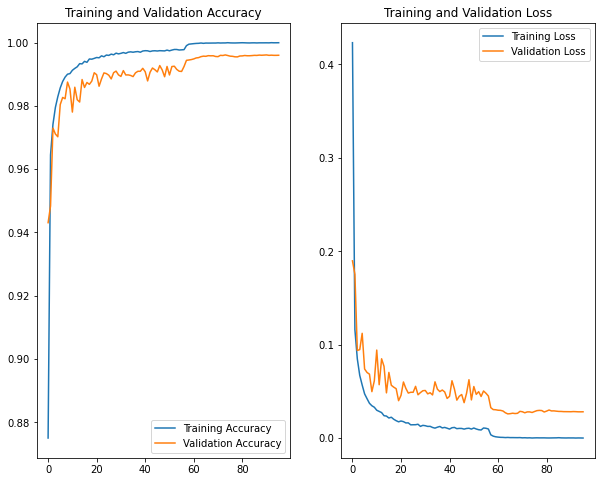

In [17]:
plot_history(history7, 96)

In [18]:
print(f"Loss: {history7.history['loss'][74]:1.4f}, val_loss: {history7.history['val_loss'][74]:1.4f}, acc: {history7.history['accuracy'][74]*100:2.4f}, val_acc: {history7.history['val_accuracy'][74]*100:2.4f}")

Loss: 0.0002, val_loss: 0.0275, acc: 99.9961, val_acc: 99.5917


---
## Step 3: Test a Model on New Images

To get a better insight into how the model is working, I downloaded six pictures of German traffic signs from the web and used the model to predict the traffic sign type.

The `signnames.csv` file was useful to map from the class id (integer) to the actual sign name.

In [12]:
## Load the best weights model

model.load_weights("./checkpoint/training_15/weights.74-0.9961.hdf5")

In [13]:
# Lets check the model performance in the dataset test

testing_file = "./data/images_test"
img_height, img_width = (32,32)
batch_size = 2048

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  testing_file,
  label_mode='int',
  shuffle=True,
  color_mode="rgb",
  image_size=(img_height, img_width),
  batch_size=batch_size)

X_test, y_test = next(iter(test_ds))

Found 12630 files belonging to 43 classes.


In [14]:
from sklearn.metrics import classification_report

predictions = model.predict(X_test, verbose=2)
print(classification_report(y_test,	predictions.argmax(axis=1), target_names=df_labels.SignName))

64/64 - 0s
                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       1.00      1.00      1.00         6
                              Speed limit (30km/h)       0.97      1.00      0.99       103
                              Speed limit (50km/h)       1.00      0.97      0.98        99
                              Speed limit (60km/h)       0.98      0.95      0.97        65
                              Speed limit (70km/h)       0.99      0.99      0.99       103
                              Speed limit (80km/h)       0.99      1.00      1.00       119
                       End of speed limit (80km/h)       1.00      1.00      1.00        41
                             Speed limit (100km/h)       1.00      0.97      0.99        35
                             Speed limit (120km/h)       1.00      1.00      1.00        20
                                        No passing       1.00      1

### Load and Output the Images

In [14]:
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

test_dir = "./data/test"
test_dir = pathlib.Path(test_dir)
class_count = len(list(test_dir.glob('*/')))
imgList = list(test_dir.glob('*.jpg'))
image_count = len(imgList)
print(f'We have {image_count} images for testing')


We have 6 images for testing


In [15]:
def load_images(images:list) -> np.ndarray:
    img_list = []
    for file in images:
        img = tf.keras.preprocessing.image.load_img(file,
        target_size=(32,32))
        img_arr = tf.keras.preprocessing.image.img_to_array(img)
        img_list.append(img_arr)
    return np.array(img_list)

In [16]:
images = load_images(imgList)

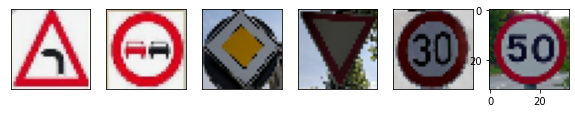

In [17]:
df_labels = pd.read_csv("signnames.csv")
plt.figure(figsize=(10, 10))
for i in range(len(images)):
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    ax = plt.subplot(1, 6, i + 1)
    plt.imshow(np.array(images[i]).astype("uint8"))
plt.show()

### Predict the Sign Type for Each Image

In [22]:
predictions = model.predict(images, verbose=2)

1/1 - 0s


### Analyze Performance

Calculate the accuracy for the new images

In [27]:
pred = tf.math.top_k(tf.constant(predictions), k=5)

In [28]:
# Based on the predictions, we have the names of the new images.

for i in range(len(pred[0])):
    print(f"Image {i}:")
    for j in range(5):
        print(f"Sign name: {df_labels.SignName[int(class_names[pred[1][i][j]])]}, Probability: {pred[0][i][j]*100.:3.2f}%")


Image 0:
Sign name: Dangerous curve to the left, Probability: 100.00%
Sign name: Speed limit (20km/h), Probability: 0.00%
Sign name: Speed limit (30km/h), Probability: 0.00%
Sign name: No passing for vehicles over 3.5 metric tons, Probability: 0.00%
Sign name: Right-of-way at the next intersection, Probability: 0.00%
Image 1:
Sign name: No passing, Probability: 100.00%
Sign name: Vehicles over 3.5 metric tons prohibited, Probability: 0.00%
Sign name: No passing for vehicles over 3.5 metric tons, Probability: 0.00%
Sign name: No vehicles, Probability: 0.00%
Sign name: Yield, Probability: 0.00%
Image 2:
Sign name: Priority road, Probability: 100.00%
Sign name: Speed limit (20km/h), Probability: 0.00%
Sign name: Speed limit (30km/h), Probability: 0.00%
Sign name: No passing for vehicles over 3.5 metric tons, Probability: 0.00%
Sign name: Right-of-way at the next intersection, Probability: 0.00%
Image 3:
Sign name: Yield, Probability: 100.00%
Sign name: Speed limit (20km/h), Probability: 0

Nice results!

We can see that the model, correctly, predicted all new images and with 100% of confidence. The exception was with 50km/h that got 90.62% that we may consider a high level of confidence. 

